In [1]:
import numpy as  np
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

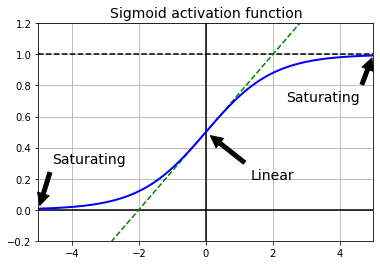

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

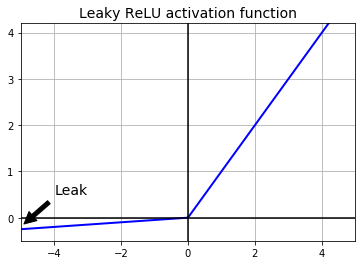

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [9]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

# LeakyReLU

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 27s 488us/sample - loss: 1.2767 - accuracy: 0.6049 - val_loss: 0.8772 - val_accuracy: 0.7230
Epoch 2/10
55000/55000 [==============================] - 20s 355us/sample - loss: 0.7931 - accuracy: 0.7437 - val_loss: 0.7121 - val_accuracy: 0.7658
Epoch 3/10
55000/55000 [==============================] - 21s 375us/sample - loss: 0.6826 - accuracy: 0.7744 - val_loss: 0.6346 - val_accuracy: 0.7926
Epoch 4/10
55000/55000 [==============================] - 20s 358us/sample - loss: 0.6245 - accuracy: 0.7923 - val_loss: 0.5905 - val_accuracy: 0.8060
Epoch 5/10
55000/55000 [==============================] - 19s 351us/sample - loss: 0.5864 - accuracy: 0.8048 - val_loss: 0.5591 - val_accuracy: 0.8166
Epoch 6/10
55000/55000 [==============================] - 19s 339us/sample - loss: 0.5594 - accuracy: 0.8132 - val_loss: 0.5408 - val_accuracy: 0.8164
Epoch 7/10
55000/55000 [=====================

# PReLU

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 23s 409us/sample - loss: 1.4002 - accuracy: 0.5795 - val_loss: 0.9519 - val_accuracy: 0.6902
Epoch 2/10
55000/55000 [==============================] - 21s 383us/sample - loss: 0.8478 - accuracy: 0.7165 - val_loss: 0.7519 - val_accuracy: 0.7500
Epoch 3/10
55000/55000 [==============================] - 21s 379us/sample - loss: 0.7183 - accuracy: 0.7615 - val_loss: 0.6684 - val_accuracy: 0.7734
Epoch 4/10
55000/55000 [==============================] - 21s 377us/sample - loss: 0.6521 - accuracy: 0.7836 - val_loss: 0.6183 - val_accuracy: 0.7944
Epoch 5/10
55000/55000 [==============================] - 20s 361us/sample - loss: 0.6090 - accuracy: 0.7977 - val_loss: 0.5824 - val_accuracy: 0.8070
Epoch 6/10
55000/55000 [==============================] - 19s 347us/sample - loss: 0.5777 - accuracy: 0.8084 - val_loss: 0.5565 - val_accuracy: 0.8196
Epoch 7/10
55000/55000 [=====================

# ELU

In [12]:
def elu(z, alpha=1):
    return np.where(z<0, alpha*(np.exp(z)-1), z)

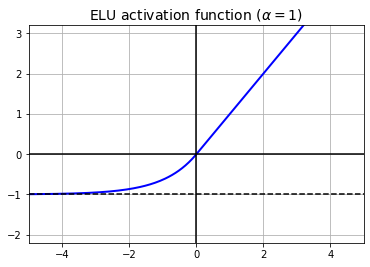

In [27]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [28]:
keras.layers.Dense(10, activation="elu")

# SELU

In [31]:
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [32]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

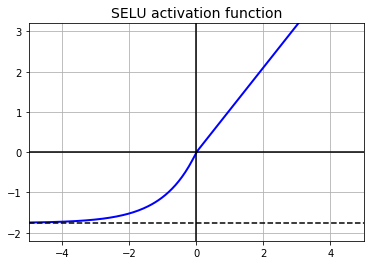

In [33]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [34]:
Z = np.random.normal(size=(500, 100))
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean 0.00, std deviation 1.00
Layer 100: mean -0.01, std deviation 0.93
Layer 200: mean -0.00, std deviation 0.88
Layer 300: mean 0.06, std deviation 0.90
Layer 400: mean 0.00, std deviation 0.90
Layer 500: mean 0.04, std deviation 0.89
Layer 600: mean -0.02, std deviation 0.92
Layer 700: mean -0.03, std deviation 0.92
Layer 800: mean 0.01, std deviation 0.92
Layer 900: mean -0.06, std deviation 0.91


In [35]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [4]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [39]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 175s 3ms/sample - loss: 1.2612 - accuracy: 0.5145 - val_loss: 1.2832 - val_accuracy: 0.4502
Epoch 2/5
55000/55000 [==============================] - 153s 3ms/sample - loss: 1.0570 - accuracy: 0.6001 - val_loss: 1.0423 - val_accuracy: 0.6050
Epoch 3/5
55000/55000 [==============================] - 154s 3ms/sample - loss: 0.7249 - accuracy: 0.7344 - val_loss: 0.6428 - val_accuracy: 0.7726
Epoch 4/5
55000/55000 [==============================] - 145s 3ms/sample - loss: 0.5995 - accuracy: 0.7868 - val_loss: 0.6303 - val_accuracy: 0.7858
Epoch 5/5
55000/55000 [==============================] - 148s 3ms/sample - loss: 0.6950 - accuracy: 0.7482 - val_loss: 0.7687 - val_accuracy: 0.7020


In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 109s 2ms/sample - loss: 1.9702 - accuracy: 0.2495 - val_loss: 1.8163 - val_accuracy: 0.3086
Epoch 2/5
55000/55000 [==============================] - 97s 2ms/sample - loss: 1.4947 - accuracy: 0.4038 - val_loss: 1.2617 - val_accuracy: 0.4256
Epoch 3/5
55000/55000 [==============================] - 95s 2ms/sample - loss: 1.0132 - accuracy: 0.5799 - val_loss: 0.8759 - val_accuracy: 0.6272
Epoch 4/5
55000/55000 [==============================] - 92s 2ms/sample - loss: 1.0889 - accuracy: 0.5585 - val_loss: 1.2825 - val_accuracy: 0.4934
Epoch 5/5
55000/55000 [==============================] - 109s 2ms/sample - loss: 1.0008 - accuracy: 0.6114 - val_loss: 0.8360 - val_accuracy: 0.7088


# Batch-Normalization

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation='elu', kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1

In [18]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 46s 839us/sample - loss: 0.8868 - accuracy: 0.7015 - val_loss: 0.5780 - val_accuracy: 0.7986
Epoch 2/10
55000/55000 [==============================] - 37s 677us/sample - loss: 0.5954 - accuracy: 0.7930 - val_loss: 0.4993 - val_accuracy: 0.8288
Epoch 3/10
55000/55000 [==============================] - 37s 673us/sample - loss: 0.5405 - accuracy: 0.8121 - val_loss: 0.4632 - val_accuracy: 0.8450
Epoch 4/10
55000/55000 [==============================] - 37s 666us/sample - loss: 0.5097 - accuracy: 0.8229 - val_loss: 0.4419 - val_accuracy: 0.8508
Epoch 5/10
55000/55000 [==============================] - 36s 658us/sample - loss: 0.4911 - accuracy: 0.8291 - val_loss: 0.4267 - val_accuracy: 0.8570
Epoch 6/10
55000/55000 [==============================] - 37s 667us/sample - loss: 0.4748 - accuracy: 0.8333 - val_loss: 0.4154 - val_accuracy: 0.8624
Epoch 7/10
55000/55000 [=====================

In [24]:
[(var.name , var.trainable) for var in model.layers[1].variables]

[('batch_normalization_2/gamma:0', True),
 ('batch_normalization_2/beta:0', True),
 ('batch_normalization_2/moving_mean:0', False),
 ('batch_normalization_2/moving_variance:0', False)]

In [25]:
model.layers[1].updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(10, activation="softmax")
])

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 784)               3136      
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235200    
_________________________________________________________________
batch_normalization_19 (Batc (None, 300)               1200      
_________________________________________________________________
activation_6 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30000     
_________________________________________________________________
batch_normalization_20 (Batc (None, 100)              

In [46]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 39s 701us/sample - loss: 0.9617 - accuracy: 0.6805 - val_loss: 0.6328 - val_accuracy: 0.7900
Epoch 2/10
55000/55000 [==============================] - 35s 636us/sample - loss: 0.6347 - accuracy: 0.7873 - val_loss: 0.5390 - val_accuracy: 0.8182
Epoch 3/10
55000/55000 [==============================] - 36s 653us/sample - loss: 0.5671 - accuracy: 0.8075 - val_loss: 0.4993 - val_accuracy: 0.8328
Epoch 4/10
55000/55000 [==============================] - 34s 614us/sample - loss: 0.5357 - accuracy: 0.8144 - val_loss: 0.4767 - val_accuracy: 0.8430
Epoch 5/10
55000/55000 [==============================] - 32s 578us/sample - loss: 0.5124 - accuracy: 0.8222 - val_loss: 0.4604 - val_accuracy: 0.8458
Epoch 6/10
55000/55000 [==============================] - 31s 558us/sample - loss: 0.4958 - accuracy: 0.8267 - val_loss: 0.4477 - val_accuracy: 0.8458
Epoch 7/10
55000/55000 [=====================

# Clipnorm or Clipvalue

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(10, activation="softmax")
])

In [41]:
sgd = keras.optimizers.SGD(clipnorm=1)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 784)               3136      
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235200    
_________________________________________________________________
batch_normalization_16 (Batc (None, 300)               1200      
_________________________________________________________________
activation_4 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30000     
_________________________________________________________________
batch_normalization_17 (Batc (None, 100)              

In [42]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 38s 689us/sample - loss: 0.5680 - accuracy: 0.8038 - val_loss: 0.4240 - val_accuracy: 0.8556
Epoch 2/10
55000/55000 [==============================] - 32s 588us/sample - loss: 0.4410 - accuracy: 0.8460 - val_loss: 0.3878 - val_accuracy: 0.8652
Epoch 3/10
55000/55000 [==============================] - 31s 560us/sample - loss: 0.4056 - accuracy: 0.8549 - val_loss: 0.3693 - val_accuracy: 0.8730
Epoch 4/10
55000/55000 [==============================] - 31s 566us/sample - loss: 0.3833 - accuracy: 0.8648 - val_loss: 0.3578 - val_accuracy: 0.8744
Epoch 5/10
55000/55000 [==============================] - 30s 554us/sample - loss: 0.3651 - accuracy: 0.8693 - val_loss: 0.3517 - val_accuracy: 0.8788
Epoch 6/10
55000/55000 [==============================] - 31s 556us/sample - loss: 0.3506 - accuracy: 0.8747 - val_loss: 0.3404 - val_accuracy: 0.8780
Epoch 7/10
55000/55000 [=====================

In [55]:
model_1 = keras.models.clone_model(model)
model_1.set_weights(model.get_weights())

# Optimization Algorithms

In [4]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [5]:
# Nesterov Accelerated Gradient
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [6]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [7]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [8]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Learning Rate Scheduling

In [9]:
# Power Scheduling
# decay = 1/steps 
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [11]:
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 25s 457us/sample - loss: 0.4913 - accuracy: 0.8294 - val_loss: 0.4124 - val_accuracy: 0.8538
Epoch 2/20
55000/55000 [==============================] - 19s 343us/sample - loss: 0.3797 - accuracy: 0.8661 - val_loss: 0.3795 - val_accuracy: 0.8660
Epoch 3/20
55000/55000 [==============================] - 19s 345us/sample - loss: 0.3462 - accuracy: 0.8780 - val_loss: 0.3594 - val_accuracy: 0.8758
Epoch 4/20
55000/55000 [==============================] - 21s 380us/sample - loss: 0.3251 - accuracy: 0.8853 - val_loss: 0.3569 - val_accuracy: 0.8784
Epoch 5/20
55000/55000 [==============================] - 19s 340us/sample - loss: 0.3088 - accuracy: 0.8903 - val_loss: 0.3406 - val_accuracy: 0.8806
Epoch 6/20
55000/55000 [==============================] - 19s 351us/sample - loss: 0.2962 - accuracy: 0.8949 - val_loss: 0.3364 - val_accuracy: 0.8844
Epoch 7/20
55000/55000 [=====================

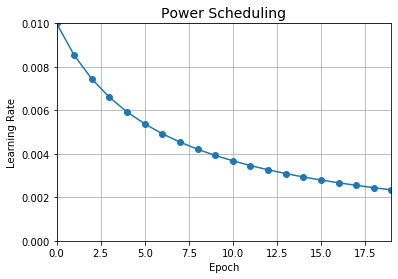

In [12]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate/(1 + decay*epochs*n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [14]:
# Exponential Scheduling

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 15

In [18]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 29s 523us/sample - loss: 0.8825 - accuracy: 0.7527 - val_loss: 1.4921 - val_accuracy: 0.7154
Epoch 2/15
55000/55000 [==============================] - 29s 525us/sample - loss: 0.7002 - accuracy: 0.7988 - val_loss: 0.7296 - val_accuracy: 0.7554
Epoch 3/15
55000/55000 [==============================] - 30s 545us/sample - loss: 0.6167 - accuracy: 0.8231 - val_loss: 0.6942 - val_accuracy: 0.8168
Epoch 4/15
55000/55000 [==============================] - 28s 513us/sample - loss: 0.5449 - accuracy: 0.8391 - val_loss: 0.5989 - val_accuracy: 0.8442
Epoch 5/15
55000/55000 [==============================] - 29s 524us/sample - loss: 0.4886 - accuracy: 0.8551 - val_loss: 0.5987 - val_accuracy: 0.8382
Epoch 6/15
55000/55000 [==============================] - 26s 465us/sample - loss: 0.4533 - accuracy: 0.8627 - val_loss: 0.5283 - val_accuracy: 0.8562
Epoch 7/15
55000/55000 [=====================

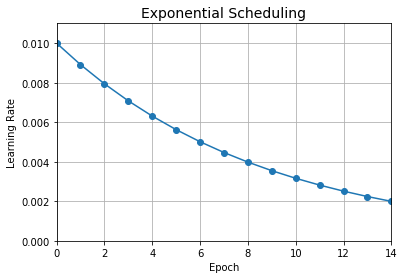

In [21]:
plt.plot(history.epoch, history.history['lr'], 'o-')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [23]:

K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 15

s = 15 * len(X_train) // 32 
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 34s 627us/sample - loss: 0.7872 - accuracy: 0.7678 - val_loss: 0.7640 - val_accuracy: 0.7452
Epoch 2/15
55000/55000 [==============================] - 30s 537us/sample - loss: 0.6264 - accuracy: 0.8080 - val_loss: 0.6141 - val_accuracy: 0.8054
Epoch 3/15
55000/55000 [==============================] - 31s 571us/sample - loss: 0.5201 - accuracy: 0.8333 - val_loss: 0.4920 - val_accuracy: 0.8476
Epoch 4/15
55000/55000 [==============================] - 29s 534us/sample - loss: 0.4614 - accuracy: 0.8509 - val_loss: 0.4879 - val_accuracy: 0.8378
Epoch 5/15
55000/55000 [==============================] - 29s 532us/sample - loss: 0.4203 - accuracy: 0.8619 - val_loss: 0.5589 - val_accuracy: 0.8438
Epoch 6/15
55000/55000 [==============================] - 30s 539us/sample - loss: 0.3723 - accuracy: 0.8786 - val_loss: 0.4526 - val_accuracy: 0.8674
Epoch 7/15
55000/55000 [=====================

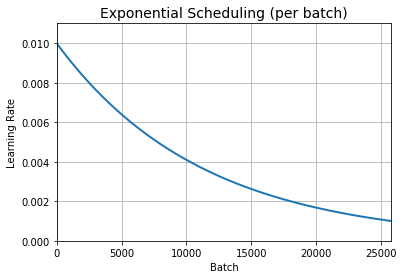

In [25]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

In [5]:
# Piece-wise Scheduling
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [6]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 30s 554us/sample - loss: 0.8432 - accuracy: 0.7572 - val_loss: 1.5322 - val_accuracy: 0.7142
Epoch 2/10
55000/55000 [==============================] - 28s 504us/sample - loss: 0.8623 - accuracy: 0.7551 - val_loss: 1.0358 - val_accuracy: 0.7242
Epoch 3/10
55000/55000 [==============================] - 26s 466us/sample - loss: 1.0917 - accuracy: 0.6606 - val_loss: 1.0602 - val_accuracy: 0.6424
Epoch 4/10
55000/55000 [==============================] - 23s 425us/sample - loss: 1.0523 - accuracy: 0.6605 - val_loss: 1.1853 - val_accuracy: 0.5968
Epoch 5/10
55000/55000 [==============================] - 23s 425us/sample - loss: 1.3488 - accuracy: 0.5779 - val_loss: 1.2621 - val_accuracy: 0.6202
Epoch 6/10
55000/55000 [==============================] - 26s 469us/sample - loss: 0.8993 - accuracy: 0.6523 - val_loss: 0.9475 - val_accuracy: 0.6348
Epoch 7/10
55000/55000 [=====================

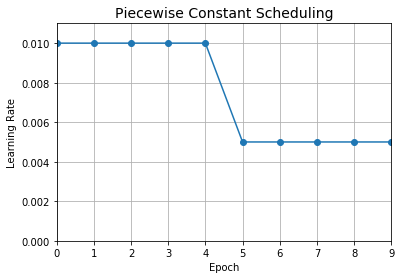

In [7]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [9]:
# Performance Scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 22s 404us/sample - loss: 0.5816 - accuracy: 0.8112 - val_loss: 0.5012 - val_accuracy: 0.8320
Epoch 2/10
55000/55000 [==============================] - 19s 340us/sample - loss: 0.5027 - accuracy: 0.8383 - val_loss: 0.4877 - val_accuracy: 0.8472
Epoch 3/10
55000/55000 [==============================] - 19s 341us/sample - loss: 0.5006 - accuracy: 0.8434 - val_loss: 0.6063 - val_accuracy: 0.8420
Epoch 4/10
55000/55000 [==============================] - 18s 336us/sample - loss: 0.5152 - accuracy: 0.8485 - val_loss: 0.5007 - val_accuracy: 0.8534
Epoch 5/10
55000/55000 [==============================] - 18s 336us/sample - loss: 0.3123 - accuracy: 0.8895 - val_loss: 0.3613 - val_accuracy: 0.8864
Epoch 6/10
55000/55000 [==============================] - 19s 341us/sample - loss: 0.2697 - accuracy: 0.9024 - val_loss: 0.3851 - val_accuracy: 0.8828
Epoch 7/10
55000/55000 [=====================

In [ ]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 23s 411us/sample - loss: 0.4860 - accuracy: 0.8302 - val_loss: 0.3999 - val_accuracy: 0.8642
Epoch 2/10
55000/55000 [==============================] - 22s 399us/sample - loss: 0.3788 - accuracy: 0.8656 - val_loss: 0.3786 - val_accuracy: 0.8694
Epoch 3/10
55000/55000 [==============================] - 22s 408us/sample - loss: 0.3449 - accuracy: 0.8780 - val_loss: 0.3603 - val_accuracy: 0.8752
Epoch 4/10
55000/55000 [==============================] - 21s 389us/sample - loss: 0.3229 - accuracy: 0.8845 - val_loss: 0.3508 - val_accuracy: 0.8752
Epoch 5/10
55000/55000 [==============================] - 22s 399us/sample - loss: 0.3059 - accuracy: 0.8910 - val_loss: 0.3404 - val_accuracy: 0.8750
Epoch 6/10
55000/55000 [==============================] - 22s 401us/sample - loss: 0.2932 - accuracy: 0.8957 - val_loss: 0.3352 - val_accuracy: 0.8812
Epoch 7/10
55000/55000 [=====================

In [12]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
                    boundaries=[5*s, 15*s],
                    values = [0.01, 0.005, 0.001])

In [13]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Train on 55000 samples
55000/55000 [==============================] - 9s 164us/sample - loss: nan - accuracy: 0.4036


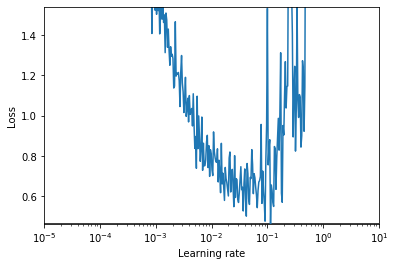

In [15]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [16]:
# 1Cycle
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [17]:
n_epochs = 10
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 121us/sample - loss: 0.6417 - accuracy: 0.7779 - val_loss: 0.4677 - val_accuracy: 0.8414
Epoch 2/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.4429 - accuracy: 0.8450 - val_loss: 0.4103 - val_accuracy: 0.8638
Epoch 3/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.3985 - accuracy: 0.8574 - val_loss: 0.3979 - val_accuracy: 0.8608
Epoch 4/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.3710 - accuracy: 0.8680 - val_loss: 0.4155 - val_accuracy: 0.8522
Epoch 5/10
55000/55000 [==============================] - 7s 120us/sample - loss: 0.3469 - accuracy: 0.8745 - val_loss: 0.3617 - val_accuracy: 0.8726
Epoch 6/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.3154 - accuracy: 0.8867 - val_loss: 0.3689 - val_accuracy: 0.8680
Epoch 7/10
55000/55000 [===========================

# L1 / L2 Regularization

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 31s 566us/sample - loss: 1.6425 - accuracy: 0.8131 - val_loss: 0.7567 - val_accuracy: 0.8072
Epoch 2/2
55000/55000 [==============================] - 27s 494us/sample - loss: 0.7189 - accuracy: 0.8257 - val_loss: 0.6801 - val_accuracy: 0.8370


In [19]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 33s 599us/sample - loss: 1.6335 - accuracy: 0.8129 - val_loss: 0.7325 - val_accuracy: 0.8204
Epoch 2/2
55000/55000 [==============================] - 28s 503us/sample - loss: 0.7197 - accuracy: 0.8259 - val_loss: 0.6930 - val_accuracy: 0.8428


# Dropout

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 31s 555us/sample - loss: 0.5771 - accuracy: 0.8028 - val_loss: 0.3581 - val_accuracy: 0.8692
Epoch 2/2
55000/55000 [==============================] - 26s 469us/sample - loss: 0.4202 - accuracy: 0.8464 - val_loss: 0.3403 - val_accuracy: 0.8762


In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 5
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 25s 456us/sample - loss: 0.6634 - accuracy: 0.7603 - val_loss: 0.5820 - val_accuracy: 0.8384
Epoch 2/5
55000/55000 [==============================] - 22s 401us/sample - loss: 0.5579 - accuracy: 0.7951 - val_loss: 0.5712 - val_accuracy: 0.8392
Epoch 3/5
55000/55000 [==============================] - 23s 426us/sample - loss: 0.5240 - accuracy: 0.8069 - val_loss: 0.5376 - val_accuracy: 0.8492
Epoch 4/5
55000/55000 [==============================] - 24s 435us/sample - loss: 0.5045 - accuracy: 0.8150 - val_loss: 0.4857 - val_accuracy: 0.8604
Epoch 5/5
55000/55000 [==============================] - 24s 444us/sample - loss: 0.4948 - accuracy: 0.8162 - val_loss: 0.4274 - val_accuracy: 0.8660


# MC Dropout

In [29]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [30]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.07, 0.  , 0.9 ]],
      dtype=float32)

In [31]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.08, 0.  , 0.76]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.77, 0.  , 0.1 , 0.02, 0.12]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.42, 0.  , 0.27, 0.  , 0.32]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.6 , 0.  , 0.07]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.34, 0.  , 0.3 , 0.  , 0.36]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.42, 0.  , 0.24]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.85, 0.  , 0.01, 0.  , 0.14]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.53, 0.  , 0.34, 0.  , 0.13]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.04, 0.  , 0.75]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.7 , 0.  , 0.16]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.76, 0.  , 0.1 , 0.  , 0.14]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.05, 0.  , 0.02]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.53, 0.  , 0.08, 0.  , 0.39]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.77, 0.  , 0.14, 0.  , 0

In [32]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.29, 0.  , 0.3 , 0.  , 0.41]],
      dtype=float32)

In [33]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.25, 0.  , 0.27]],
      dtype=float32)

In [34]:
y_pred = np.argmax(y_proba, axis=1)
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8527

In [35]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [36]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

mc_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

In [38]:
model.layers[1].rate

0.2

# Max-Norm

In [39]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 31s 555us/sample - loss: 0.4806 - accuracy: 0.8325 - val_loss: 0.3870 - val_accuracy: 0.8626
Epoch 2/2
55000/55000 [==============================] - 27s 483us/sample - loss: 0.3588 - accuracy: 0.8699 - val_loss: 0.3532 - val_accuracy: 0.8702
